In [1]:
# Import needed modules

import numpy as np
import pandas
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits

# Inline plots
%matplotlib inline

In [2]:
# APOGEE All Stars File, obtained from
# https://data.sdss.org/sas/dr17/apogee/spectro/aspcap/dr17/synspec_rev1/allStar-dr17-synspec_rev1.fits

file = '../data/allStar-dr17-synspec_rev1.fits'

# Read file into table
tbl = Table.read(file)

In [3]:
# Get SNR filter
snr_filter = tbl['SNR'] > 250
print('Num stars: %i' %sum(snr_filter))

Num stars: 170183


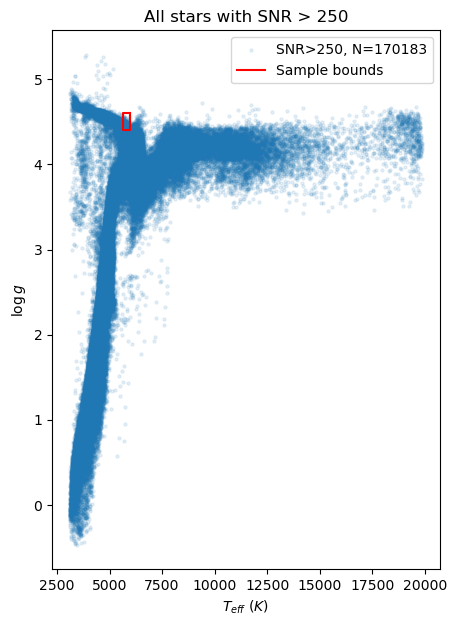

In [4]:
# Plot teff vs. logg 
_ = plt.figure(figsize=(5,7))
plt.title('All stars with SNR > 250')
plt.scatter(tbl['TEFF'][snr_filter], tbl['LOGG'][snr_filter], 
            s=5, alpha=0.1, label='SNR>250, N=%i' %sum(snr_filter))

# Additionally, plot box used for selecting solar-type stars

# Parameters for selection box
teff = 5800
teff_spread = 150
logg = 4.5
logg_spread = 0.1

plt.plot([
        teff + teff_spread,
        teff + teff_spread,
        teff - teff_spread,
        teff - teff_spread,
        teff + teff_spread
    ], 
    [
        logg + logg_spread,
        logg - logg_spread,
        logg - logg_spread,
        logg + logg_spread,
        logg + logg_spread
    ], c='r', label='Sample bounds')
plt.xlabel('$T_{eff}$ ($K$)')
plt.ylabel('$\log g$')
plt.legend()
plt.savefig('teff_logg_all.png',dpi=150,bbox_inches='tight')

In [5]:
# Filter for stars in red box above.
star_filter = np.array(
    (snr_filter) &
    (tbl['TEFF'] > teff - teff_spread) &
    (tbl['TEFF'] < teff + teff_spread) &
    (tbl['LOGG'] > logg - logg_spread) &
    (tbl['LOGG'] < logg + logg_spread) &
    (tbl['GAIAEDR3_PHOT_BP_MEAN_MAG'] - tbl['GAIAEDR3_PHOT_RP_MEAN_MAG'] < 1.0 )
)

print('Num stars: %i' %sum(star_filter))

Num stars: 1254


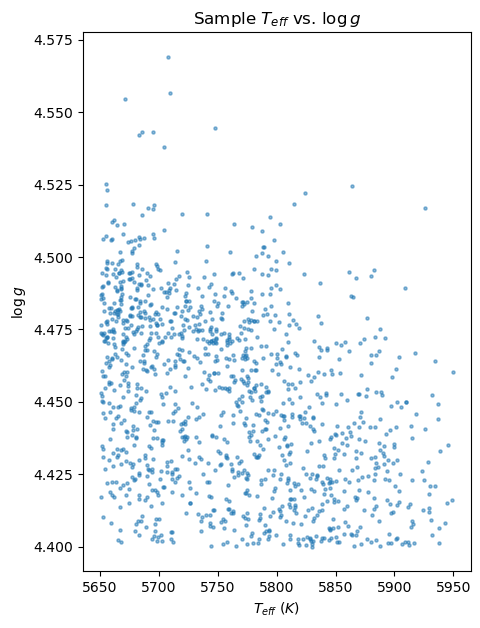

In [6]:
# Plot HR diagram of stars in sample
_ = plt.figure(figsize=(5,7))
plt.scatter(tbl['TEFF'][star_filter], tbl['LOGG'][star_filter], 
            s=5, alpha=0.5)
plt.xlabel('$T_{eff}$ ($K$)')
plt.ylabel('$\log g$')
plt.title('Sample $T_{eff}$ vs. $\log g$')
plt.savefig('teff_logg.png',dpi=150,bbox_inches='tight')

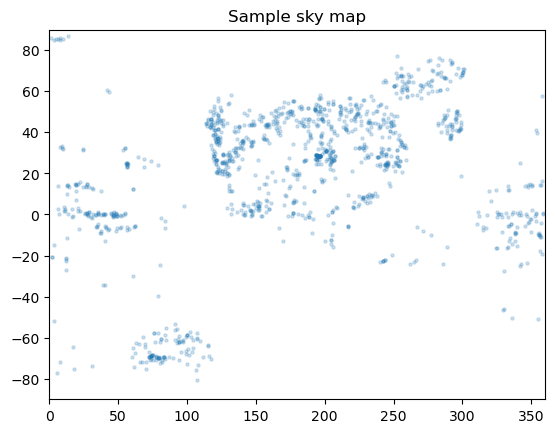

In [7]:
# Sky map of stars in sample
_ = plt.scatter(tbl['RA'][star_filter], tbl['DEC'][star_filter], s=5, alpha=0.2)
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.title('Sample sky map')
plt.savefig('skymap.png',dpi=150,bbox_inches='tight')

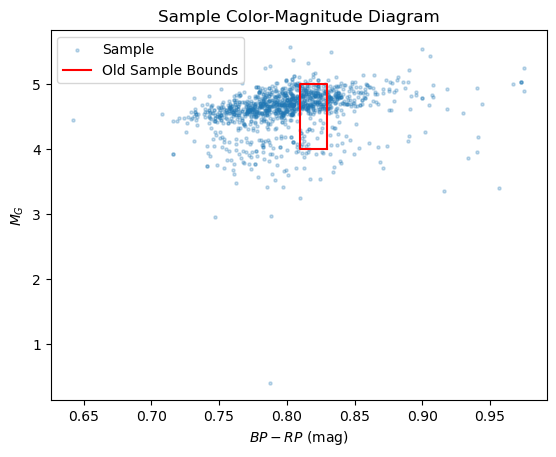

In [8]:
_ = plt.scatter(tbl['GAIAEDR3_PHOT_BP_MEAN_MAG'][star_filter] - tbl['GAIAEDR3_PHOT_RP_MEAN_MAG'][star_filter], 
            tbl['GAIAEDR3_PHOT_G_MEAN_MAG'][star_filter] - 5.* np.log10(tbl['GAIAEDR3_R_MED_PHOTOGEO'][star_filter])+5, 
            s=5, alpha=0.25, label='Sample')
plt.plot([0.82+0.01, 0.82+0.01, 0.82-0.01, 0.82-0.01, 0.82+0.01], [4,5,5,4,4], c='r', label='Old Sample Bounds')
plt.xlabel('$BP - RP$ (mag)')
plt.ylabel('$M_G$')
plt.legend()
plt.title('Sample Color-Magnitude Diagram')
plt.savefig('cmd.png',dpi=150,bbox_inches='tight')

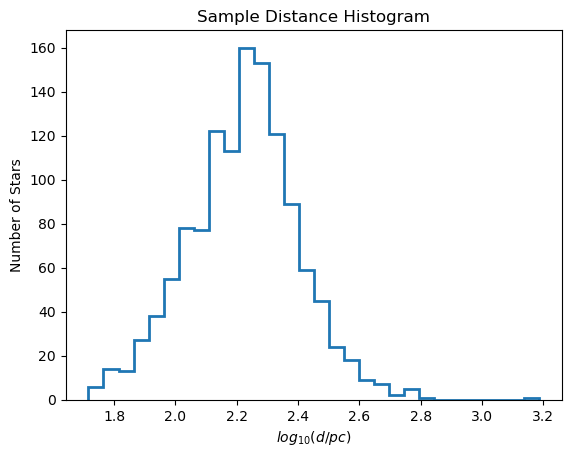

In [9]:
_ = plt.hist(np.log10(tbl['GAIAEDR3_R_LO_PHOTOGEO'][star_filter]),bins=30, lw=2, histtype='step')
plt.xlabel(r'$log_{10}(d/pc)$')
plt.ylabel('Number of Stars')
plt.title('Sample Distance Histogram')
plt.savefig('dist.png',dpi=150,bbox_inches='tight')

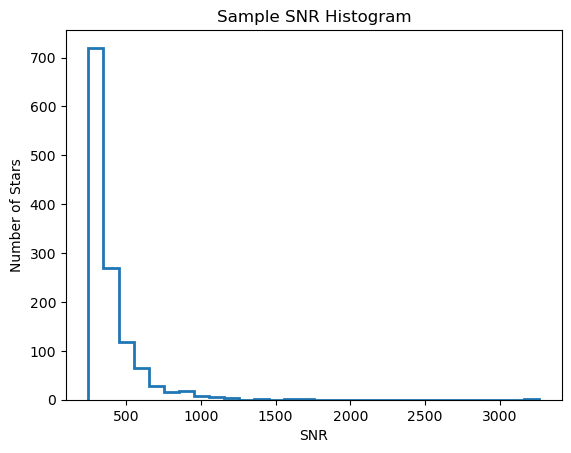

In [10]:
_ = plt.hist(tbl['SNR'][star_filter],bins=30, histtype='step', lw=2)
plt.xlabel('SNR')
plt.ylabel('Number of Stars')
plt.title('Sample SNR Histogram')
plt.savefig('snr.png',dpi=150,bbox_inches='tight')

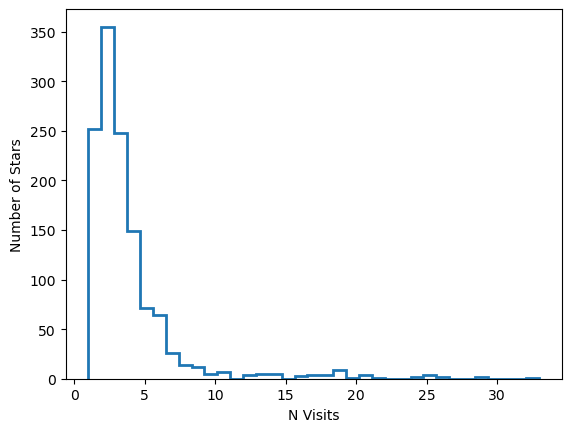

In [11]:
plt.hist(tbl['NVISITS'][star_filter],bins=35, histtype='step', lw=2)
plt.xlabel('N Visits')
_ = plt.ylabel('Number of Stars')
plt.savefig('nvisits.png',dpi=150,bbox_inches='tight')

In [16]:
# Save table as fits file
tbl[:][star_filter].write('../data/sample_star_rev2.fits')

In [17]:
# Construct sample file URLS
telescopes = tbl['TELESCOPE'][star_filter]
fields = tbl['FIELD'][star_filter]
files = tbl['FILE'][star_filter]

urls = np.array(
    [
        'https://data.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/%s/%s/%s' %atts
        for atts in zip(telescopes, fields, files)
    ]
)

print('Files available: %i' %len(urls))

Files available: 1254


In [18]:
with open('../data/sample_star_urls_rev2', 'w') as f:
    for url in urls:
        f.write(url + '\n')